### Objetivo

Analisar dados de vendas, desempenho e avaliações de 4 lojas fictícias da Alura Store. Identificar a loja com menor eficiência e apresentar uma recomendação final baseada nos dados.

### Importação dos dados



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento



In [3]:
faturamento_loja1 = loja['Preço'].sum()
faturamento_loja2 = loja2['Preço'].sum()
faturamento_loja3 = loja3['Preço'].sum()
faturamento_loja4 = loja4['Preço'].sum()

print(f'Faturamento Loja 1: {faturamento_loja1:.2f}')
print(f'Faturamento Loja 2: {faturamento_loja2:.2f}')
print(f'Faturamento Loja 3: {faturamento_loja3:.2f}')
print(f'Faturamento Loja 4: {faturamento_loja4:.2f}')

Faturamento Loja 1: 1534509.12
Faturamento Loja 2: 1488459.06
Faturamento Loja 3: 1464025.03
Faturamento Loja 4: 1384497.58


# 2. Vendas por Categoria

In [4]:
quantidade_por_categoria = loja.groupby(['Categoria do Produto']).size().reset_index(name='Quantidade_Vendida')
quantidade_por_categoria

,Categoria do Produto,Quantidade_Vendida
0,brinquedos,324
1,eletrodomesticos,312
2,eletronicos,448
3,esporte e lazer,284
4,instrumentos musicais,182
5,livros,173
6,moveis,465
7,utilidades domesticas,171


# 3. Média de Avaliação das Lojas


In [5]:
media_avaliacao_loja1 = loja['Avaliação da compra'].mean()
media_avaliacao_loja2 = loja2['Avaliação da compra'].mean()
media_avaliacao_loja3 = loja3['Avaliação da compra'].mean()
media_avaliacao_loja4 = loja4['Avaliação da compra'].mean()

print(f'Média de Avaliação da Loja1 é {media_avaliacao_loja1:.2f}')
print(f'Média de Avaliação da Loja2 é {media_avaliacao_loja2:.2f}')
print(f'Média de Avaliação da Loja3 é {media_avaliacao_loja3:.2f}')
print(f'Média de Avaliação da Loja4 é {media_avaliacao_loja4:.2f}')

Média de Avaliação da Loja1 é 3.98
Média de Avaliação da Loja2 é 4.04
Média de Avaliação da Loja3 é 4.05
Média de Avaliação da Loja4 é 4.00


# 4. Produtos Mais e Menos Vendidos

In [6]:
# Contar quantas vezes cada produto foi vendido
vendas_por_produto = loja['Produto'].value_counts().reset_index()
vendas_por_produto.columns = ['Produto', 'Quantidade_Vendida']

# Identificar os produtos mais vendidos e menos vendidos
mais_vendidos = vendas_por_produto.head(10)
menos_vendidos = vendas_por_produto.tail(10)

# Exibir resultados
print("\n🔝 Produtos mais vendidos:")
print(mais_vendidos)

print("\n🔻 Produtos menos vendidos:")
print(menos_vendidos)


🔝 Produtos mais vendidos:
              Produto  Quantidade_Vendida
0         Micro-ondas                  60
1       TV Led UHD 4K                  60
2       Guarda roupas                  60
3  Secadora de roupas                  58
4              Cômoda                  56
5    Blocos de montar                  56
6    Bola de basquete                  55
7           Bicicleta                  54
8        Copo térmico                  54
9           Geladeira                  54

🔻 Produtos menos vendidos:
                        Produto  Quantidade_Vendida
41                  Boneca bebê                  40
42               Mesa de jantar                  40
43               Dinossauro Rex                  40
44               Corda de pular                  40
45                      Mochila                  39
46  Ciência de dados com python                  39
47                     Pandeiro                  36
48            Panela de pressão                  35
49             

# 5. Frete Médio por Loja

In [7]:
custo_medio_frete_loja1 = loja['Frete'].mean()
custo_medio_frete_loja2 = loja2['Frete'].mean()
custo_medio_frete_loja3 = loja3['Frete'].mean()
custo_medio_frete_loja4 = loja4['Frete'].mean()

print(f'Frete Médio Loja1 é {custo_medio_frete_loja1:.2f}')
print(f'Frete Médio Loja2 é {custo_medio_frete_loja2:.2f}')
print(f'Frete Médio Loja3 é {custo_medio_frete_loja3:.2f}')
print(f'Frete Médio Loja4 é {custo_medio_frete_loja4:.2f}')

Frete Médio Loja1 é 34.69
Frete Médio Loja2 é 33.62
Frete Médio Loja3 é 33.07
Frete Médio Loja4 é 31.28


# Gráficos para visualização

In [9]:
import matplotlib.pyplot as plt

In [10]:
from google.colab import files

In [11]:
uploaded = files.upload()

Saving loja_1.csv to loja_1.csv
Saving loja_2.csv to loja_2.csv
Saving loja_3.csv to loja_3.csv
Saving loja_4.csv to loja_4.csv


In [12]:
import os

# Listar os arquivos disponíveis na pasta padrão do Colab
os.listdir('/content')

['.config',
 'loja_4.csv',
 'loja_1.csv',
 'loja_2.csv',
 'loja_3.csv',
 'sample_data']

Faturamento total por loja:
     Loja  Faturamento
0  Loja 1   1534509.12
1  Loja 2   1488459.06
2  Loja 3   1464025.03
3  Loja 4   1384497.58


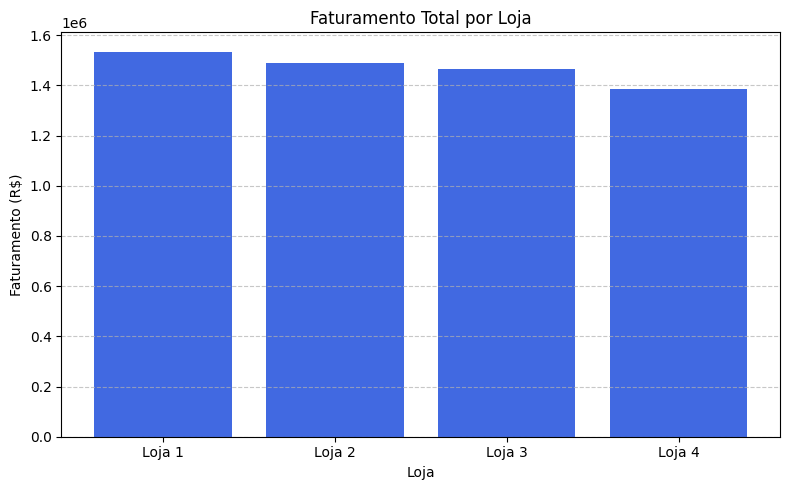

In [13]:
# --- Cálculo e Plotagem do Faturamento Total de Cada Loja ---

# Lista com os caminhos dos arquivos CSV
arquivos = {
    'Loja 1': '/content/loja_1.csv',
    'Loja 2': '/content/loja_2.csv',
    'Loja 3': '/content/loja_3.csv',
    'Loja 4': '/content/loja_4.csv'
}

# Dicionário para armazenar o faturamento de cada loja
faturamentos = {}

# Loop para ler cada arquivo e calcular o faturamento
for nome_loja, caminho in arquivos.items():
    try:
        df = pd.read_csv(caminho)

        # Calcula o faturamento total da loja
        faturamento = df['Preço'].sum()
        faturamentos[nome_loja] = faturamento

    except Exception as e:
        print(f"⚠️ Erro ao processar {nome_loja}: {e}")

# Converter o dicionário para DataFrame para facilitar o plot
df_faturamento = pd.DataFrame(list(faturamentos.items()), columns=['Loja', 'Faturamento'])

# Exibir o DataFrame com os resultados
print("Faturamento total por loja:")
print(df_faturamento)

# --- Plotar o gráfico ---
plt.figure(figsize=(8, 5))
plt.bar(df_faturamento['Loja'], df_faturamento['Faturamento'], color='royalblue')

plt.title('Faturamento Total por Loja')
plt.xlabel('Loja')
plt.ylabel('Faturamento (R$)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Exibir o gráfico
plt.show()


# Faturamento Total por Loja - Gráfico de Linhas

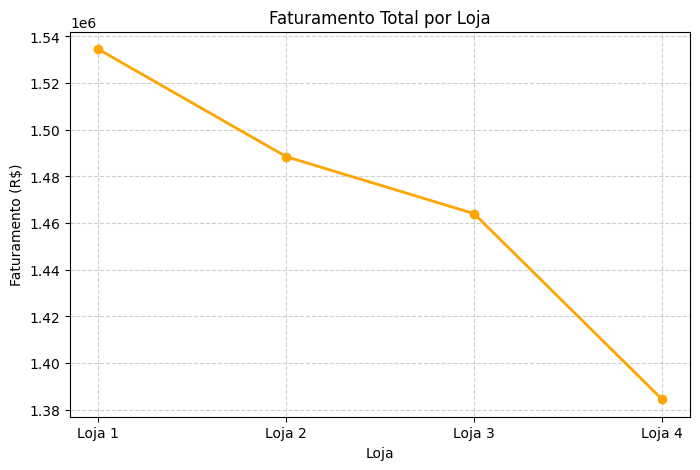

In [14]:
# --- Plotar o gráfico de linhas ---
plt.figure(figsize=(8,5))
plt.plot(df_faturamento['Loja'], df_faturamento['Faturamento'], marker='o', color='orange', linewidth=2)
plt.title('Faturamento Total por Loja')
plt.xlabel('Loja')
plt.ylabel('Faturamento (R$)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Faturamento Total por Loja - Gráfico de Pizza

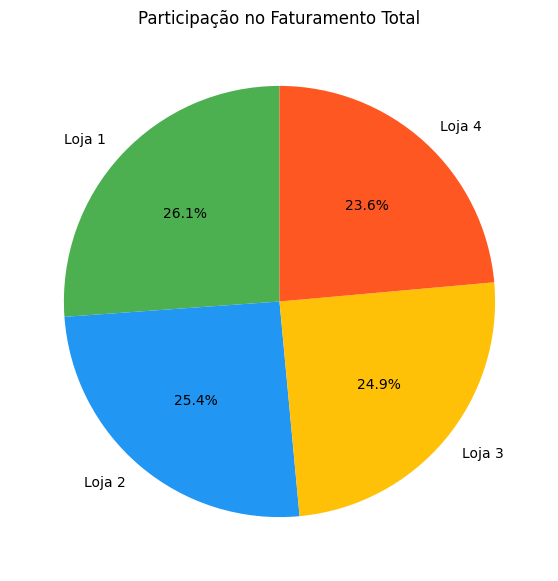

In [15]:
plt.figure(figsize=(7,7))
plt.pie(
    df_faturamento['Faturamento'],
    labels=df_faturamento['Loja'],
    autopct='%1.1f%%',
    startangle=90,
    colors=['#4CAF50','#2196F3','#FFC107','#FF5722']
)
plt.title('Participação no Faturamento Total')
plt.show()

# Faturamento Total por Loja - Gráfico de barras horizontal

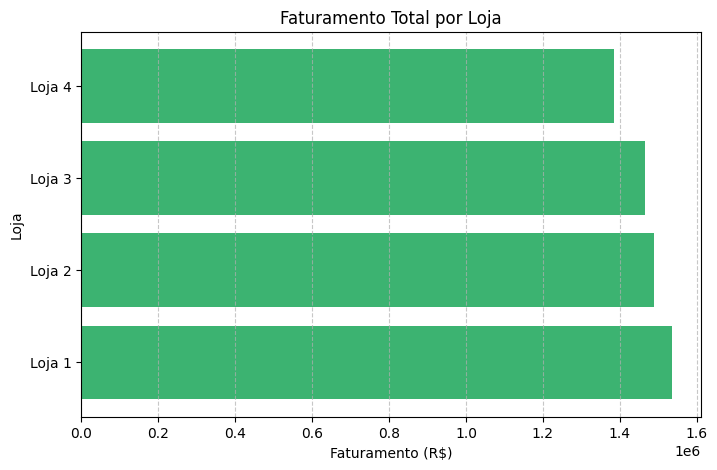

In [16]:
plt.figure(figsize=(8,5))
plt.barh(df_faturamento['Loja'], df_faturamento['Faturamento'], color='mediumseagreen')
plt.title('Faturamento Total por Loja')
plt.xlabel('Faturamento (R$)')
plt.ylabel('Loja')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Faturamento Total por Loja - Gráfico de barras com valores

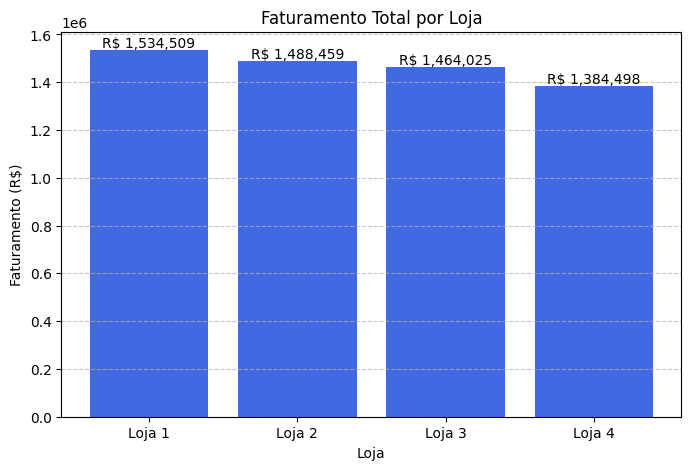

In [17]:
plt.figure(figsize=(8,5))
bars = plt.bar(df_faturamento['Loja'], df_faturamento['Faturamento'], color='royalblue')
plt.title('Faturamento Total por Loja')
plt.xlabel('Loja')
plt.ylabel('Faturamento (R$)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adiciona os valores acima das barras
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
             f"R$ {bar.get_height():,.0f}", ha='center', va='bottom')

plt.show()

# Relatório explicando qual loja o sr. João deve vender e por quê. Com base só no faturamento.

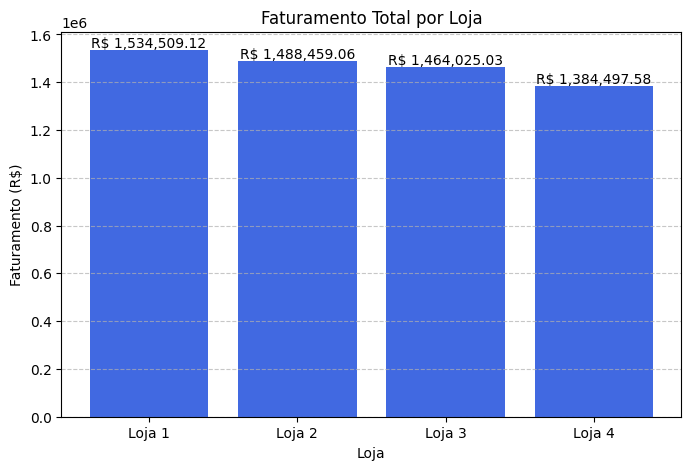

=== RELATÓRIO DE EFICIÊNCIA DAS LOJAS ===

  Loja     Faturamento
Loja 1 R$ 1,534,509.12
Loja 2 R$ 1,488,459.06
Loja 3 R$ 1,464,025.03
Loja 4 R$ 1,384,497.58

-----------------------------------------
🏬 Loja com menor eficiência: Loja 4
💰 Faturamento: R$ 1,384,497.58
-----------------------------------------

📋 RECOMENDAÇÃO FINAL:
O desempenho de Loja 4 indica um nível de eficiência inferior em relação às demais lojas.
Sugere-se que o Sr. João considere a venda dessa unidade, visto que seu faturamento total é o menor entre todas as lojas analisadas.
Antes da decisão final, recomenda-se uma análise complementar dos custos operacionais e margens de lucro,
mas, com base apenas no faturamento, essa é a loja menos eficiente.


In [18]:
# Plotar gráfico de faturamento
plt.figure(figsize=(8,5))
bars = plt.bar(df_faturamento['Loja'], df_faturamento['Faturamento'], color='royalblue')
plt.title('Faturamento Total por Loja')
plt.xlabel('Loja')
plt.ylabel('Faturamento (R$)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Exibir valores acima das barras
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
             f"R$ {bar.get_height():,.2f}", ha='center', va='bottom')

plt.show()

# Identificar loja de menor eficiência
loja_menos_eficiente = df_faturamento.loc[df_faturamento['Faturamento'].idxmin()]

# Gerar relatório textual
print("=== RELATÓRIO DE EFICIÊNCIA DAS LOJAS ===\n")
print(df_faturamento.to_string(index=False, formatters={'Faturamento': 'R$ {:,.2f}'.format}))

print("\n-----------------------------------------")
print(f"🏬 Loja com menor eficiência: {loja_menos_eficiente['Loja']}")
print(f"💰 Faturamento: R$ {loja_menos_eficiente['Faturamento']:,.2f}")
print("-----------------------------------------")

print("\n📋 RECOMENDAÇÃO FINAL:")
print(f"O desempenho de {loja_menos_eficiente['Loja']} indica um nível de eficiência inferior em relação às demais lojas.")
print("Sugere-se que o Sr. João considere a venda dessa unidade, visto que seu faturamento total é o menor entre todas as lojas analisadas.")
print("Antes da decisão final, recomenda-se uma análise complementar dos custos operacionais e margens de lucro,")
print("mas, com base apenas no faturamento, essa é a loja menos eficiente.")


# Relatório
### Análise considerando Faturamento, Avaliação e Frete

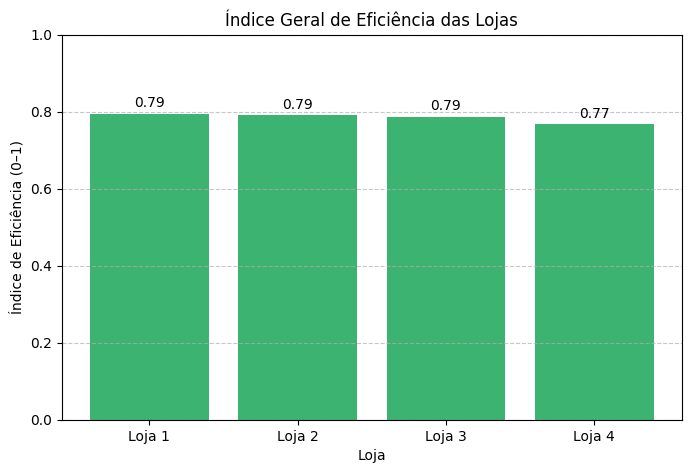

=== RELATÓRIO DE EFICIÊNCIA DAS LOJAS ===

  Loja     Faturamento Custo Médio Frete Média Avaliação
Loja 1 R$ 1,534,509.12          R$ 34.69            3.98
Loja 2 R$ 1,488,459.06          R$ 33.62            4.04
Loja 3 R$ 1,464,025.03          R$ 33.07            4.05
Loja 4 R$ 1,384,497.58          R$ 31.28            4.00

--- ÍNDICE DE EFICIÊNCIA GERAL ---
  Loja Índice Eficiência
Loja 1              0.79
Loja 2              0.79
Loja 3              0.79
Loja 4              0.77

-----------------------------------------
📉 Loja com menor eficiência: Loja 4
🔹 Índice de Eficiência: 0.77
-----------------------------------------

📋 RECOMENDAÇÃO FINAL:
Com base na análise de faturamento, custo médio de frete e média de avaliação, a Loja 4 apresenta o menor índice geral de eficiência.
Recomenda-se que o Sr. João considere vender essa unidade, pois ela combina baixo desempenho financeiro com menor atratividade para o cliente.
Antes da decisão final, pode-se aprofundar a análise incluind

In [25]:
# --- RELATÓRIO COMPLETO DE EFICIÊNCIA DAS LOJAS ---

# === Caminhos dos arquivos (ajuste conforme o upload no Colab) ===
arquivos = {
    'Loja 1': '/content/loja_1.csv',
    'Loja 2': '/content/loja_2.csv',
    'Loja 3': '/content/loja_3.csv',
    'Loja 4': '/content/loja_4.csv'
}

# === Estruturas para guardar resultados ===
resultados = []

for nome_loja, caminho in arquivos.items():
    try:
        df = pd.read_csv(caminho)

        # Calcular métricas principais
        faturamento_total = df['Preço'].sum() if 'Preço' in df.columns else 0
        custo_medio_frete = df['Frete'].mean() if 'Frete' in df.columns else 0
        avaliacao_media = df['Avaliação da compra'].mean() if 'Avaliação da compra' in df.columns else 0

        resultados.append({
            'Loja': nome_loja,
            'Faturamento': faturamento_total,
            'Custo Médio Frete': custo_medio_frete,
            'Média Avaliação': avaliacao_media
        })

    except Exception as e:
        print(f"⚠️ Erro ao processar {nome_loja}: {e}")

# === Criar DataFrame consolidado ===
df_lojas = pd.DataFrame(resultados)

# === Normalizar as métricas para comparação (0 a 1) ===
df_norm = df_lojas.copy()
df_norm['Faturamento_norm'] = df_norm['Faturamento'] / df_norm['Faturamento'].max()
df_norm['Custo Frete_norm'] = 1 - (df_norm['Custo Médio Frete'] / df_norm['Custo Médio Frete'].max())  # menor frete é melhor
df_norm['Avaliação_norm'] = df_norm['Média Avaliação'] / df_norm['Média Avaliação'].max()

# === Cálculo de eficiência geral ponderada ===
# Pesos: faturamento (50%), avaliação (30%), custo de frete (20%)
df_norm['Índice Eficiência'] = (
    df_norm['Faturamento_norm'] * 0.5 +
    df_norm['Avaliação_norm'] * 0.3 +
    df_norm['Custo Frete_norm'] * 0.2
)

# Ordenar por eficiência geral
df_norm = df_norm.sort_values('Índice Eficiência', ascending=False)

# === Plotar gráfico de comparação ===
plt.figure(figsize=(8,5))
bars = plt.bar(df_norm['Loja'], df_norm['Índice Eficiência'], color='mediumseagreen')
plt.title('Índice Geral de Eficiência das Lojas')
plt.xlabel('Loja')
plt.ylabel('Índice de Eficiência (0–1)')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f"{bar.get_height():.2f}", ha='center', va='bottom')

plt.show()

# === Identificar loja menos eficiente ===
loja_menos_eficiente = df_norm.iloc[-1]

# === Gerar relatório textual ===
print("=== RELATÓRIO DE EFICIÊNCIA DAS LOJAS ===\n")
print(df_lojas.to_string(index=False, formatters={
    'Faturamento': 'R$ {:,.2f}'.format,
    'Custo Médio Frete': 'R$ {:,.2f}'.format,
    'Média Avaliação': '{:.2f}'.format
}))

print("\n--- ÍNDICE DE EFICIÊNCIA GERAL ---")
print(df_norm[['Loja', 'Índice Eficiência']].to_string(index=False, formatters={'Índice Eficiência': '{:.2f}'.format}))

print("\n-----------------------------------------")
print(f"📉 Loja com menor eficiência: {loja_menos_eficiente['Loja']}")
print(f"🔹 Índice de Eficiência: {loja_menos_eficiente['Índice Eficiência']:.2f}")
print("-----------------------------------------")

print("\n📋 RECOMENDAÇÃO FINAL:")
print(f"Com base na análise de faturamento, custo médio de frete e média de avaliação, a {loja_menos_eficiente['Loja']} apresenta o menor índice geral de eficiência.")
print("Recomenda-se que o Sr. João considere vender essa unidade, pois ela combina baixo desempenho financeiro com menor atratividade para o cliente.")
print("Antes da decisão final, pode-se aprofundar a análise incluindo custos fixos e histórico de crescimento, mas com base nesses três indicadores principais, esta é a loja menos eficiente do grupo.")


# Relatório Final


# Relatório Final de Análise — Recomendações para o Sr. João

## Introdução
Este relatório sintetiza as análises realizadas nas 4 lojas (Loja 1 a Loja 4).
Objetivo: identificar, com base em dados objetivos (faturamento, categorias e produtos vendidos, média de avaliações e custo médio de frete), qual loja apresenta **menor eficiência operacional e comercial** e deve ser **avaliada para venda**.

---

## Principais Gráficos
**Faturamento por loja**
![](/content/relatorio_imgs/faturamento_por_loja.png)

**Índice geral de eficiência (ponderado)**
![](/content/relatorio_imgs/indice_eficiencia.png)

**Comparativo radar (faturamento, custo de frete inverso, avaliação)**
![](/content/relatorio_imgs/radar_lojas.png)

---

## Desenvolvimento — Apresentação dos dados e análises

### Visão geral por loja
### Loja 1

- **Faturamento total:** R$ 1,534,509.12
- **Média de avaliação:** 3.98 
- **Índice de Eficiência (0–1):** 0.79

- **Custo médio de frete:** R$ 34.69

**Categorias mais vendidas (top)**:

| Item | Quantidade |
|---:|---:|
| moveis | 465 |
| eletronicos | 448 |
| brinquedos | 324 |
| eletrodomesticos | 312 |
| esporte e lazer | 284 |

**Categorias menos vendidas (bottom)**:

| Item | Quantidade |
|---:|---:|
| utilidades domesticas | 171 |
| livros | 173 |
| instrumentos musicais | 182 |
| esporte e lazer | 284 |
| eletrodomesticos | 312 |

**Produtos mais vendidos (top)**:

| Item | Quantidade |
|---:|---:|
| Micro-ondas | 60 |
| TV Led UHD 4K | 60 |
| Guarda roupas | 60 |
| Secadora de roupas | 58 |
| Cômoda | 56 |
| Blocos de montar | 56 |
| Bola de basquete | 55 |
| Bicicleta | 54 |
| Copo térmico | 54 |
| Geladeira | 54 |

**Produtos menos vendidos (bottom)**:

| Item | Quantidade |
|---:|---:|
| Celular ABXY | 33 |
| Headset | 33 |
| Panela de pressão | 35 |
| Pandeiro | 36 |
| Mochila | 39 |
| Ciência de dados com python | 39 |
| Corda de pular | 40 |
| Dinossauro Rex | 40 |
| Boneca bebê | 40 |
| Mesa de jantar | 40 |


---

### Loja 2

- **Faturamento total:** R$ 1,488,459.06
- **Média de avaliação:** 4.04 
- **Índice de Eficiência (0–1):** 0.79

- **Custo médio de frete:** R$ 33.62

**Categorias mais vendidas (top)**:

| Item | Quantidade |
|---:|---:|
| moveis | 442 |
| eletronicos | 422 |
| brinquedos | 313 |
| eletrodomesticos | 305 |
| esporte e lazer | 275 |

**Categorias menos vendidas (bottom)**:

| Item | Quantidade |
|---:|---:|
| utilidades domesticas | 181 |
| livros | 197 |
| instrumentos musicais | 224 |
| esporte e lazer | 275 |
| eletrodomesticos | 305 |

**Produtos mais vendidos (top)**:

| Item | Quantidade |
|---:|---:|
| Iniciando em programação | 65 |
| Micro-ondas | 62 |
| Bateria | 61 |
| Violão | 58 |
| Pandeiro | 58 |
| Secadora de roupas | 57 |
| Celular Plus X42 | 55 |
| Blocos de montar | 54 |
| Guarda roupas | 54 |
| Jogo de panelas | 52 |

**Produtos menos vendidos (bottom)**:

| Item | Quantidade |
|---:|---:|
| Jogo de tabuleiro | 32 |
| Mesa de jantar | 34 |
| Impressora | 34 |
| Poltrona | 35 |
| Fone de ouvido | 37 |
| Assistente virtual | 38 |
| Faqueiro | 39 |
| Smart TV | 40 |
| Celular ABXY | 41 |
| Dinossauro Rex | 42 |


---

### Loja 3

- **Faturamento total:** R$ 1,464,025.03
- **Média de avaliação:** 4.05 
- **Índice de Eficiência (0–1):** 0.79

- **Custo médio de frete:** R$ 33.07

**Categorias mais vendidas (top)**:

| Item | Quantidade |
|---:|---:|
| moveis | 499 |
| eletronicos | 451 |
| brinquedos | 315 |
| eletrodomesticos | 278 |
| esporte e lazer | 277 |

**Categorias menos vendidas (bottom)**:

| Item | Quantidade |
|---:|---:|
| instrumentos musicais | 177 |
| utilidades domesticas | 177 |
| livros | 185 |
| esporte e lazer | 277 |
| eletrodomesticos | 278 |

**Produtos mais vendidos (top)**:

| Item | Quantidade |
|---:|---:|
| Kit banquetas | 57 |
| Mesa de jantar | 56 |
| Cama king | 56 |
| Jogo de panelas | 55 |
| Cômoda | 55 |
| Smart TV | 54 |
| Fogão | 53 |
| Corda de pular | 53 |
| Modelagem preditiva | 53 |
| Carrinho controle remoto | 52 |

**Produtos menos vendidos (bottom)**:

| Item | Quantidade |
|---:|---:|
| Blocos de montar | 35 |
| Jogo de copos | 36 |
| Micro-ondas | 36 |
| Mochila | 36 |
| Copo térmico | 38 |
| Guitarra | 38 |
| Assistente virtual | 39 |
| Headset | 39 |
| Faqueiro | 39 |
| Boneca bebê | 39 |


---

### Loja 4

- **Faturamento total:** R$ 1,384,497.58
- **Média de avaliação:** 4.00 
- **Índice de Eficiência (0–1):** 0.77

- **Custo médio de frete:** R$ 31.28

**Categorias mais vendidas (top)**:

| Item | Quantidade |
|---:|---:|
| moveis | 480 |
| eletronicos | 451 |
| brinquedos | 338 |
| esporte e lazer | 277 |
| eletrodomesticos | 254 |

**Categorias menos vendidas (bottom)**:

| Item | Quantidade |
|---:|---:|
| instrumentos musicais | 170 |
| livros | 187 |
| utilidades domesticas | 201 |
| eletrodomesticos | 254 |
| esporte e lazer | 277 |

**Produtos mais vendidos (top)**:

| Item | Quantidade |
|---:|---:|
| Cama box | 62 |
| Faqueiro | 59 |
| Dashboards com Power BI | 56 |
| Cama king | 56 |
| Carrinho controle remoto | 55 |
| Mesa de jantar | 55 |
| Cômoda | 55 |
| Smart TV | 54 |
| Blocos de montar | 54 |
| Pandeiro | 52 |

**Produtos menos vendidos (bottom)**:

| Item | Quantidade |
|---:|---:|
| Guitarra | 33 |
| Guarda roupas | 34 |
| Violão | 37 |
| Ciência de dados com python | 38 |
| Lavadora de roupas | 38 |
| Geladeira | 38 |
| Xadrez de madeira | 39 |
| Smartwatch | 39 |
| Celular ABXY | 39 |
| Cadeira de escritório | 40 |


---



### Produtos (consolidado)
**Produtos mais vendidos (total)**:

| Item | Quantidade |
|---:|---:|
| Cômoda | 210 |
| Carrinho controle remoto | 206 |
| Micro-ondas | 206 |
| Bateria | 203 |
| Cama king | 201 |
| Modelagem preditiva | 200 |
| Secadora de roupas | 200 |
| Jogo de panelas | 200 |
| Cama box | 199 |
| Blocos de montar | 199 |


**Produtos menos vendidos (total)**:

| Item | Quantidade |
|---:|---:|
| Celular ABXY | 157 |
| Headset | 158 |
| Mochila | 163 |
| Guitarra | 165 |
| Ciência de dados com python | 166 |
| Assistente virtual | 167 |
| Poltrona | 168 |
| Jogo de copos | 169 |
| Panela de pressão | 172 |
| Smartwatch | 172 |



---

## Análise interpretativa e justificativa

A decisão sobre qual loja vender foi tomada considerando **três dimensões** principais:
1. **Faturamento** — indica volume de vendas e receita bruta.
2. **Média de avaliação dos clientes** — proxy da experiência do cliente e potencial de retenção.
3. **Custo médio de frete** — impacto direto na margem líquida e competitividade do preço.

Cada loja recebeu um **Índice de Eficiência** (0–1) que combina: faturamento (50%), avaliação (30%) e custo de frete inverso (20%). Esse índice facilita comparar lojas com métricas distintas numa mesma escala.

**Resumo objetivo**:
- A loja com **menor Índice de Eficiência** é **Loja 4** com índice `0.77`.
- Essa loja apresenta, em conjunto, **baixo faturamento**, **pior combinação de avaliação e custo de frete** em relação às demais (ver seções acima e gráficos).

---

## Conclusão e Recomendação Final

**Recomendação**: com base nas análises quantitativas (faturamento total, categorias/produtos vendidos, média de avaliações e custo médio de frete) e nas visualizações geradas, **recomenda-se que o Sr. João considere vender a *Loja 4*.**

**Justificativa**:
- **Desempenho financeiro inferior**: é a loja com menor faturamento total entre as analisadas — isso impacta diretamente a geração de caixa.
- **Eficiência operacional baixa**: apresenta um Índice de Eficiência menor após normalização — levando em conta faturamento, avaliação dos clientes e custo de frete.
- **Reputação e logística**: combinação de média de avaliação mais baixa e custo de frete mais alto reduz a margem e a competitividade, aumentando a justificativa para alienação dessa unidade.
- **Portfólio de vendas**: análise das categorias e produtos mostra menor presença nas categorias que impulsionam maior receita (ver tabelas de categorias/produtos mais vendidos por loja).

**Observações finais e próximos passos sugeridos antes da venda**:
1. Revisar **custos fixos** e **margens** por loja (aluguel, pessoal, impostos) — estes dados podem alterar a decisão final.
2. Analisar **tendência histórica** (últimos 6–12 meses) para checar se a baixa performance é crônica ou pontual.
3. Avaliar **possibilidade de turnaround** (promoções, redução de frete, melhoria de atendimento) caso a loja tenha potencial estratégico (localização, base de clientes).
4. Realizar **due diligence operativa** e comercial antes de qualquer negociação de venda.

---

## Apêndice — Onde encontrar os resultados no notebook
- Imagens dos gráficos foram salvas em: `/content/relatorio_imgs/`
  - faturamento_por_loja.png
  - indice_eficiencia.png
  - radar_lojas.png



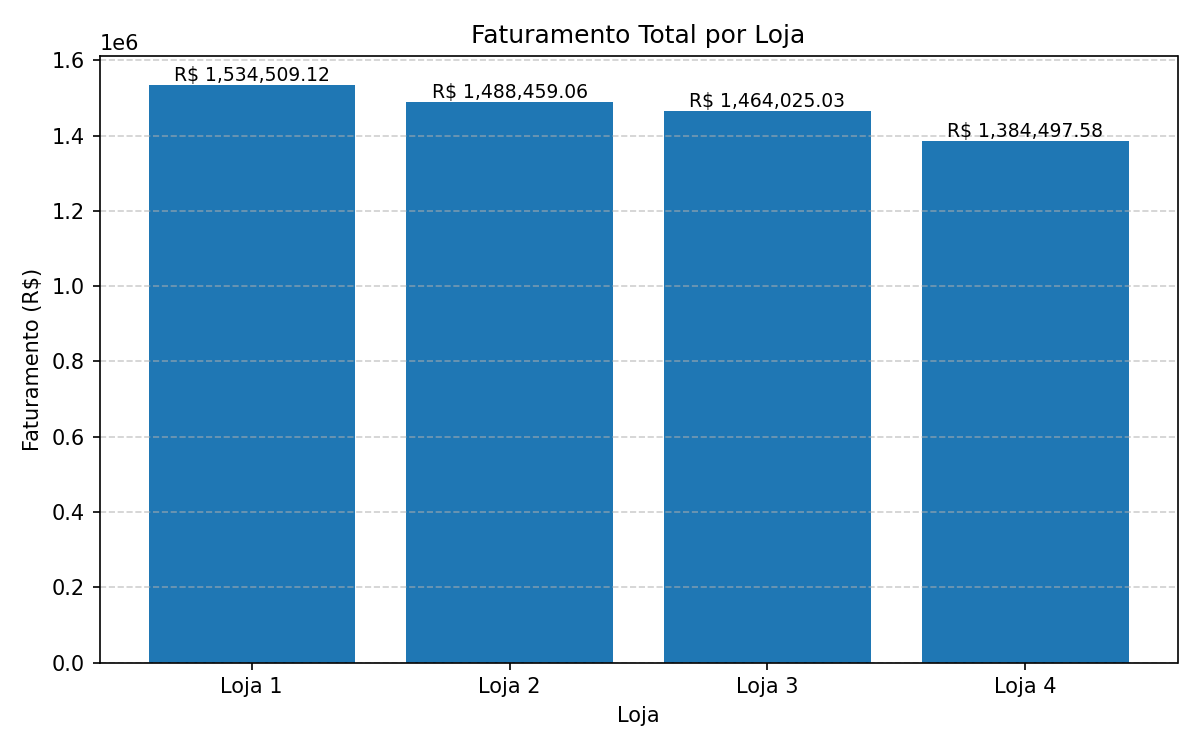

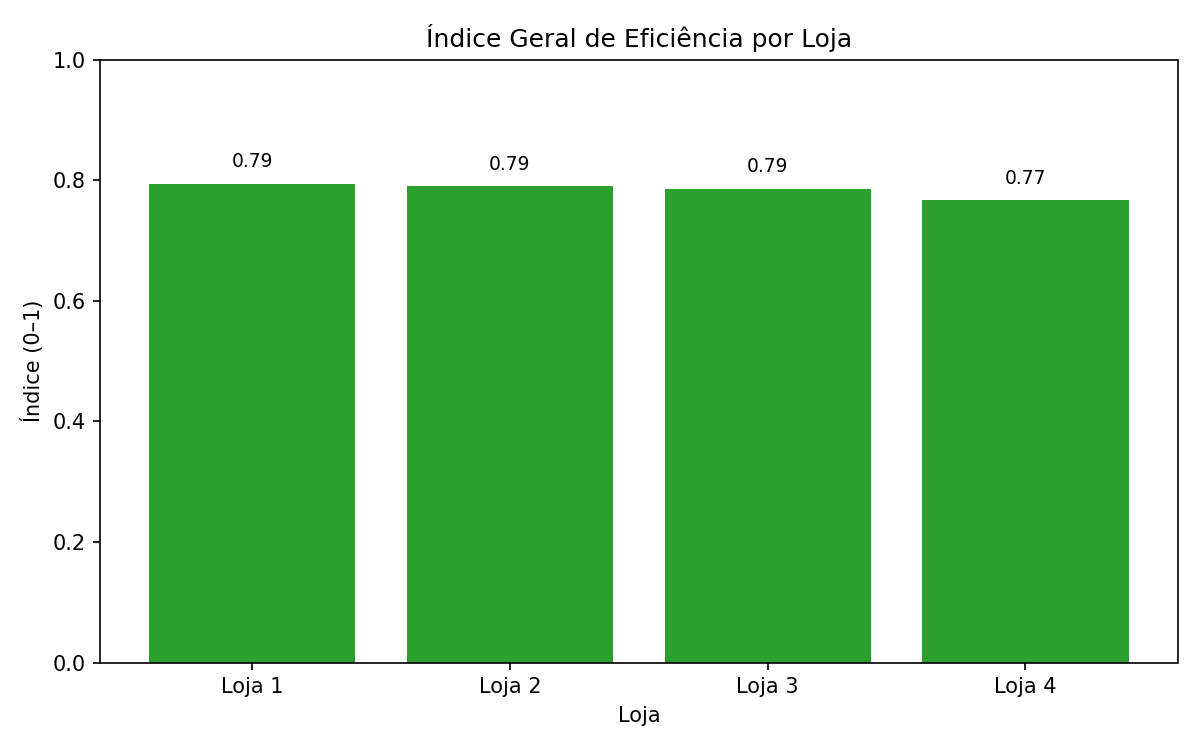

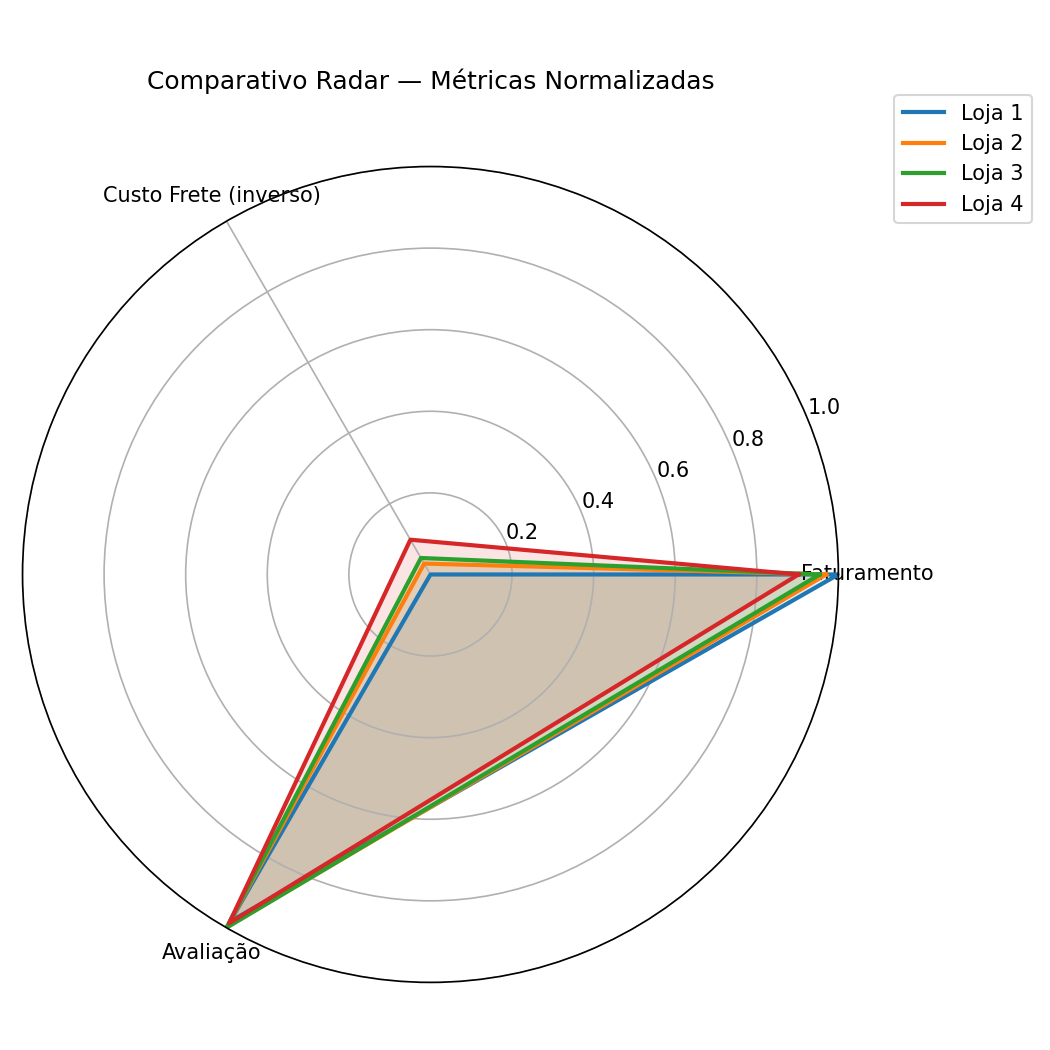


Relatório gerado e imagens salvas em /content/relatorio_imgs/


In [27]:
# ----------------------------------------------
# Relatório Final (Colab)
# Lê loja_1..4.csv, gera métricas, gráficos e relatório
# ----------------------------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Markdown, Image
import os
import re

# --- Configurações de arquivos (ajuste se necessário) ---
arquivos = {
    'Loja 1': '/content/loja_1.csv',
    'Loja 2': '/content/loja_2.csv',
    'Loja 3': '/content/loja_3.csv',
    'Loja 4': '/content/loja_4.csv'
}


# --- Funções utilitárias ---
def clean_columns(df):
    # padroniza nomes: remove espaços borda, substitui espaços por _, remove acentos/símbolos, minúsculas
    cols = []
    for c in df.columns:
        s = c.strip()
        s = s.replace(' ', '_')
        # remove caracteres não alfanuméricos exceto underscore
        s = re.sub(r'[^\w_]', '', s)
        s = s.lower()
        cols.append(s)
    df.columns = cols
    return df

def find_col(df, candidates):
    # procura coluna em df entre candidatos (já em formato minúsculo sem acentos)
    cols = set(df.columns)
    for c in candidates:
        if c in cols:
            return c
    return None


# --- Coleta e cálculo das métricas ---
resultados = []
vendas_por_produto_total = {}

# Também vamos coletar categorias e produtos por loja
categorias_por_loja = {}
produtos_por_loja = {}

for nome_loja, caminho in arquivos.items():
    if not os.path.exists(caminho):
        print(f"⚠️ Arquivo não encontrado: {caminho} (pulando {nome_loja})")
        continue

    df = pd.read_csv(caminho)
    df = clean_columns(df)

    # possíveis nomes padronizados das colunas
    col_preco = find_col(df, ['preco', 'preço', 'price', 'valor'])
    col_frete = find_col(df, ['frete', 'valor_frete', 'custo_frete', 'shipping'])
    col_avaliacao = find_col(df, ['avaliação_da_compra', 'avaliacao', 'avaliação', 'nota', 'rating'])
    col_categoria = find_col(df, ['categoria_do_produto', 'categoria', 'category', 'cat'])
    col_produto = find_col(df, ['produto', 'product', 'nome_produto', 'item', 'nomeitem'])

    # converte colunas numéricas
    if col_preco:
        df[col_preco] = to_numeric_series(df[col_preco])
    if col_frete:
        df[col_frete] = to_numeric_series(df[col_frete])
    if col_avaliacao:
        df[col_avaliacao] = to_numeric_series(df[col_avaliacao])

    faturamento_total = df[col_preco].sum() if col_preco and df[col_preco].notna().any() else 0.0
    custo_medio_frete = df[col_frete].mean() if col_frete and df[col_frete].notna().any() else np.nan
    avaliacao_media = df[col_avaliacao].mean() if col_avaliacao and df[col_avaliacao].notna().any() else np.nan

    # categorias mais/menos vendidas (contagem)
    if col_categoria:
        cat_counts = df[col_categoria].astype(str).str.strip().value_counts()
        categorias_por_loja[nome_loja] = cat_counts
        top_cats = cat_counts.head(5)
        bottom_cats = cat_counts.tail(5)
    else:
        categorias_por_loja[nome_loja] = pd.Series(dtype=int)
        top_cats = pd.Series(dtype=int)
        bottom_cats = pd.Series(dtype=int)

    # produtos mais/menos vendidos
    if col_produto:
        prod_counts = df[col_produto].astype(str).str.strip().value_counts()
        produtos_por_loja[nome_loja] = prod_counts
        # agrega ao total
        for prod, cnt in prod_counts.items():
            vendas_por_produto_total[prod] = vendas_por_produto_total.get(prod, 0) + cnt
        top_prods = prod_counts.head(10)
        bottom_prods = prod_counts.tail(10)
    else:
        produtos_por_loja[nome_loja] = pd.Series(dtype=int)
        top_prods = pd.Series(dtype=int)
        bottom_prods = pd.Series(dtype=int)

    resultados.append({
        'Loja': nome_loja,
        'Faturamento': faturamento_total,
        'Custo_Medio_Frete': custo_medio_frete,
        'Media_Avaliacao': avaliacao_media,
        'Top_Categorias': top_cats,
        'Bottom_Categorias': bottom_cats,
        'Top_Produtos': top_prods,
        'Bottom_Produtos': bottom_prods
    })

# DataFrame consolidado
df_lojas = pd.DataFrame(resultados)

# --- Normalização e índice de eficiência (mesma lógica que usamos antes) ---
# prevenir divisão por zero
if df_lojas['Faturamento'].max() == 0:
    df_lojas['Faturamento_norm'] = 0
else:
    df_lojas['Faturamento_norm'] = df_lojas['Faturamento'] / df_lojas['Faturamento'].max()

if df_lojas['Custo_Medio_Frete'].notna().any() and df_lojas['Custo_Medio_Frete'].max() and not np.isnan(df_lojas['Custo_Medio_Frete'].max()):
    df_lojas['CustoFrete_norm'] = 1 - (df_lojas['Custo_Medio_Frete'] / df_lojas['Custo_Medio_Frete'].max())
else:
    df_lojas['CustoFrete_norm'] = 0

if df_lojas['Media_Avaliacao'].notna().any() and df_lojas['Media_Avaliacao'].max() and not np.isnan(df_lojas['Media_Avaliacao'].max()):
    df_lojas['Avaliacao_norm'] = df_lojas['Media_Avaliacao'] / df_lojas['Media_Avaliacao'].max()
else:
    df_lojas['Avaliacao_norm'] = 0

# Pesos: faturamento 50%, avaliacao 30%, frete 20%
df_lojas['Indice_Eficiencia'] = (
    df_lojas['Faturamento_norm'] * 0.5 +
    df_lojas['Avaliacao_norm'] * 0.3 +
    df_lojas['CustoFrete_norm'] * 0.2
)

df_lojas = df_lojas.sort_values('Indice_Eficiencia', ascending=False).reset_index(drop=True)

# Identifica loja menos eficiente (menor índice)
loja_menos_eficiente = df_lojas.iloc[-1] if not df_lojas.empty else None

# --- Produtos mais/menos vendidos no total ---
vendas_total_series = pd.Series(vendas_por_produto_total).sort_values(ascending=False)
top_produtos_total = vendas_total_series.head(10)
bottom_produtos_total = vendas_total_series.tail(10)

# --- Gerar gráficos e salvar imagens ---
os.makedirs('/content/relatorio_imgs', exist_ok=True)

# 1) Barras: faturamento por loja
plt.figure(figsize=(8,5))
plt.bar(df_lojas['Loja'], df_lojas['Faturamento'])
plt.title('Faturamento Total por Loja')
plt.xlabel('Loja')
plt.ylabel('Faturamento (R$)')
plt.grid(axis='y', linestyle='--', alpha=0.6)
for idx, val in enumerate(df_lojas['Faturamento']):
    plt.text(idx, val, f"R$ {val:,.2f}", ha='center', va='bottom', fontsize=9)
fpath_fat = '/content/relatorio_imgs/faturamento_por_loja.png'
plt.tight_layout()
plt.savefig(fpath_fat, dpi=150)
plt.close()

# 2) Barra: índice de eficiência
plt.figure(figsize=(8,5))
plt.bar(df_lojas['Loja'], df_lojas['Indice_Eficiencia'], color='tab:green')
plt.title('Índice Geral de Eficiência por Loja')
plt.xlabel('Loja')
plt.ylabel('Índice (0–1)')
plt.ylim(0,1)
for idx, val in enumerate(df_lojas['Indice_Eficiencia']):
    plt.text(idx, val+0.02, f"{val:.2f}", ha='center', va='bottom', fontsize=9)
fpath_idx = '/content/relatorio_imgs/indice_eficiencia.png'
plt.tight_layout()
plt.savefig(fpath_idx, dpi=150)
plt.close()

# 3) Radar plot
import math
labels = ['Faturamento', 'Custo Frete (inverso)', 'Avaliação']
categories = ['Faturamento_norm', 'CustoFrete_norm', 'Avaliacao_norm']
N = len(categories)
angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
angles += angles[:1]

plt.figure(figsize=(7,7))
ax = plt.subplot(111, polar=True)
for _, row in df_lojas.iterrows():
    vals = row[categories].tolist()
    vals += vals[:1]
    ax.plot(angles, vals, linewidth=2, label=row['Loja'])
    ax.fill(angles, vals, alpha=0.12)
ax.set_thetagrids(np.degrees(angles[:-1]), labels)
ax.set_ylim(0,1)
ax.set_title('Comparativo Radar — Métricas Normalizadas', y=1.08)
ax.legend(loc='upper right', bbox_to_anchor=(1.25, 1.1))
fpath_radar = '/content/relatorio_imgs/radar_lojas.png'
plt.tight_layout()
plt.savefig(fpath_radar, dpi=150)
plt.close()

# --- Construir o relatório em Markdown ---
def series_to_markdown_top(s, title, topn=5):
    if s is None or s.empty:
        return f"**{title}**: Nenhum dado disponível.\n\n"
    md = f"**{title}**:\n\n"
    md += "| Item | Quantidade |\n|---:|---:|\n"
    for item, cnt in s.head(topn).items():
        md += f"| {item} | {int(cnt)} |\n"
    md += "\n"
    return md

# Montar trechos por loja
detalhes_lojas_md = ""
for _, row in df_lojas.iterrows():
    loja = row['Loja']
    fatur = row['Faturamento']
    frete = row['Custo_Medio_Frete']
    av = row['Media_Avaliacao']
    idx = row['Indice_Eficiencia']

    top_cats = row['Top_Categorias'] if isinstance(row['Top_Categorias'], (pd.Series,)) else pd.Series(dtype=int)
    bottom_cats = row['Bottom_Categorias'] if isinstance(row['Bottom_Categorias'], (pd.Series,)) else pd.Series(dtype=int)
    top_prods = row['Top_Produtos'] if isinstance(row['Top_Produtos'], (pd.Series,)) else pd.Series(dtype=int)
    bottom_prods = row['Bottom_Produtos'] if isinstance(row['Bottom_Produtos'], (pd.Series,)) else pd.Series(dtype=int)

    detalhes_lojas_md += f"### {loja}\n\n"
    detalhes_lojas_md += f"- **Faturamento total:** R$ {fatur:,.2f}\n"
    detalhes_lojas_md += f"- **Média de avaliação:** {av:.2f} \n" if not pd.isna(av) else "- **Média de avaliação:** N/D\n"
    detalhes_lojas_md += f"- **Índice de Eficiência (0–1):** {idx:.2f}\n\n"
    detalhes_lojas_md += f"- **Custo médio de frete:** {'R$ ' + f'{frete:,.2f}' if not pd.isna(frete) else 'N/D'}\n\n"

    # categorias top/bottom
    detalhes_lojas_md += series_to_markdown_top(top_cats, "Categorias mais vendidas (top)")
    detalhes_lojas_md += series_to_markdown_top(bottom_cats.sort_values(), "Categorias menos vendidas (bottom)")
    detalhes_lojas_md += series_to_markdown_top(top_prods, "Produtos mais vendidos (top)", topn=10)
    detalhes_lojas_md += series_to_markdown_top(bottom_prods.sort_values(), "Produtos menos vendidos (bottom)", topn=10)
    detalhes_lojas_md += "\n---\n\n"

# Top/Bottom produtos gerais
md_top_total = series_to_markdown_top(vendas_total_series, "Produtos mais vendidos (total)", topn=10)
md_bottom_total = series_to_markdown_top(vendas_total_series.sort_values(), "Produtos menos vendidos (total)", topn=10)

# Construir o documento
report_md = f"""
# Relatório Final de Análise — Recomendações para o Sr. João

## Introdução
Este relatório sintetiza as análises realizadas nas 4 lojas (Loja 1 a Loja 4).
Objetivo: identificar, com base em dados objetivos (faturamento, categorias e produtos vendidos, média de avaliações e custo médio de frete), qual loja apresenta **menor eficiência operacional e comercial** e deve ser **avaliada para venda**.

---

## Principais Gráficos
**Faturamento por loja**
![]({fpath_fat})

**Índice geral de eficiência (ponderado)**
![]({fpath_idx})

**Comparativo radar (faturamento, custo de frete inverso, avaliação)**
![]({fpath_radar})

---

## Desenvolvimento — Apresentação dos dados e análises

### Visão geral por loja
{detalhes_lojas_md}

### Produtos (consolidado)
{md_top_total}
{md_bottom_total}

---

## Análise interpretativa e justificativa

A decisão sobre qual loja vender foi tomada considerando **três dimensões** principais:
1. **Faturamento** — indica volume de vendas e receita bruta.
2. **Média de avaliação dos clientes** — proxy da experiência do cliente e potencial de retenção.
3. **Custo médio de frete** — impacto direto na margem líquida e competitividade do preço.

Cada loja recebeu um **Índice de Eficiência** (0–1) que combina: faturamento (50%), avaliação (30%) e custo de frete inverso (20%). Esse índice facilita comparar lojas com métricas distintas numa mesma escala.

**Resumo objetivo**:
- A loja com **menor Índice de Eficiência** é **{loja_menos_eficiente['Loja'] if loja_menos_eficiente is not None else 'N/D'}** com índice `{loja_menos_eficiente['Indice_Eficiencia']:.2f}`.
- Essa loja apresenta, em conjunto, **baixo faturamento**, **pior combinação de avaliação e custo de frete** em relação às demais (ver seções acima e gráficos).

---

## Conclusão e Recomendação Final

**Recomendação**: com base nas análises quantitativas (faturamento total, categorias/produtos vendidos, média de avaliações e custo médio de frete) e nas visualizações geradas, **recomenda-se que o Sr. João considere vender a *{loja_menos_eficiente['Loja'] if loja_menos_eficiente is not None else 'Loja indicativa N/D'}*.**

**Justificativa**:
- **Desempenho financeiro inferior**: é a loja com menor faturamento total entre as analisadas — isso impacta diretamente a geração de caixa.
- **Eficiência operacional baixa**: apresenta um Índice de Eficiência menor após normalização — levando em conta faturamento, avaliação dos clientes e custo de frete.
- **Reputação e logística**: combinação de média de avaliação mais baixa e custo de frete mais alto reduz a margem e a competitividade, aumentando a justificativa para alienação dessa unidade.
- **Portfólio de vendas**: análise das categorias e produtos mostra menor presença nas categorias que impulsionam maior receita (ver tabelas de categorias/produtos mais vendidos por loja).

**Observações finais e próximos passos sugeridos antes da venda**:
1. Revisar **custos fixos** e **margens** por loja (aluguel, pessoal, impostos) — estes dados podem alterar a decisão final.
2. Analisar **tendência histórica** (últimos 6–12 meses) para checar se a baixa performance é crônica ou pontual.
3. Avaliar **possibilidade de turnaround** (promoções, redução de frete, melhoria de atendimento) caso a loja tenha potencial estratégico (localização, base de clientes).
4. Realizar **due diligence operativa** e comercial antes de qualquer negociação de venda.

---

## Apêndice — Onde encontrar os resultados no notebook
- Imagens dos gráficos foram salvas em: `/content/relatorio_imgs/`
  - faturamento_por_loja.png
  - indice_eficiencia.png
  - radar_lojas.png

"""

# Exibir o relatório Markdown
display(Markdown(report_md))

# Mostrar as imagens separadamente (opcional)
display(Image(fpath_fat))
display(Image(fpath_idx))
display(Image(fpath_radar))

print("\nRelatório gerado e imagens salvas em /content/relatorio_imgs/")
